# Chapter 5: Machine Learning - Evaluating Classifiers



## Evaluating classifiers

Last week we trained classifiers to predict the wine color based on the words that appear in its review.
We also saw how we can make predictions on the test set using the trained model.

How can we decide if our classification model is a good one or not?
The most obvious way: count how many times the predictions were correct (and how many times not)
This is also called "__accuracy__".

So we need to first get the predictions for all items in our test set and calculate the accuracy score on the whole test set!

We will first use our model that used 10 features from last week and load it from saved file (this file "lr_10.pkl" is also available on Ufora).


In [1]:
import pickle
terms = ["tannin", "cherry", "oak", "fresh", "vanilla", "rich", "blackberry", "very", "dry", "spice"]


# Load the model with 10 features (terms)
with open('lr_10.pkl', 'rb') as file:
    lr_10 = pickle.load(file)
    
# Let's see again what are the possible labels to predict (and in which order they are stored)
print(lr_10.classes_)

# Let's print each label and corresponding coefficients and intercept
for label, coefs, intercept in zip(lr_10.classes_, lr_10.coef_, lr_10.intercept_):
    print(label)
    for t, c in zip(terms, coefs):
        print(t, c)
    print("INTERCEPT:" +str(intercept))
    print()
#How can we interpret the coefficients and the intercept?



['Red' 'Rose' 'White' 'unk']
Red
tannin 2.382461273386408
cherry 1.928970012767703
oak 1.3042030023043565
fresh -0.7149517516725749
vanilla -0.34716764147001156
rich -0.2220600106867783
blackberry 2.449242500770421
very 0.14220087858552352
dry -0.2473573279598481
spice 0.6561101053710591
INTERCEPT:0.8487285304892033

Rose
tannin -0.628140459703769
cherry 1.3942922887029294
oak -1.4604957811382817
fresh 0.4941489879939106
vanilla 0.2982768660843579
rich -0.48821712262423256
blackberry 0.34056780065690934
very -0.4142090532051382
dry 0.13033337204289439
spice -0.39830837504745725
INTERCEPT:-1.6510306244599227

White
tannin -1.8925700798181717
cherry -2.8615983290324465
oak 1.0497553647032736
fresh 0.10477162637993818
vanilla 0.0654654126094052
rich 0.23438256993235185
blackberry -2.3510858025847483
very -0.008158208590233796
dry -0.14114913457806372
spice -0.11114232497459865
INTERCEPT:1.209772754410819

unk
tannin 0.13824926613551286
cherry -0.4616639724381877
oak -0.8934625858693623
fr

Let's extract the features for our test set again to get predictions.

In [2]:
import pandas
import numpy

# Let's read our test set and make the feature vectors
test_set = pandas.read_csv('./test.csv', sep='\t', encoding='utf-8')
test_set

# Let's extract only the relevant columns, and put them in lists
# These colums have the titles 'Review' and 'Color'
test_reviews = test_set['Review'].to_list()
test_colors = test_set['Color'].to_list()

# Print the first five item in each list to make sure it looks ok
for rev, col in zip(test_reviews[:5], test_colors[:5]):
  print(rev)
  print(col)
  print()



# Create zero vectors (of length 10) for each review (of len(test_reviews))
test_features = numpy.zeros((len(test_reviews), 10))
print(test_features.shape)


Leather, spice, tobacco and tea emerge from the nose of this Sicilian blend of Nero d’Avola, Syrah, Merlot, Cabernet and Petit Verdot. You’ll get aromas of clove, allspice and vanilla behind vibrant blueberry and raspberry.
Red

So pale that it’s almost colorless, the Blangé—made from Arneis grapes in Piedmont—has the oak-meets-citrus nose you’d expect of a Chardonnay. The lemon, grapefruit and pear flavors, coupled with a superspritzy, Asti-like mouthfeel, make this a good Sunday brunch eye-opener. Its slightly high acidity could cut through any French toast or waffle that you throw its way. Finishes medium-long, with herbal notes. 
White

Comes across on the earthy, herbal side, although there are some pretty raspberry notes on the palate. A little heavy, and lacks perhaps some delicacy. A sweet cola-like finish completes the picture.
Red

What a wonderful wine to pair with spaghetti alle vongole or calamari fritti. Made from Grechetto grapes and aged only in stainless steel, this is

In [3]:
# Generate features
import spacy

nlp = spacy.load('en_core_web_sm')


# Process a text
test_doc_reviews = nlp.pipe(test_reviews)

# Update the feature vectors by checkin if the terms exist per review
for review, f in zip(test_doc_reviews, test_features):
    tokens_list = [token.lemma_ for token in review]
    #print(tokens_list)
    for term in terms:
        if term in tokens_list:
            term_id = terms.index(term)
            f[term_id] = 1


Now we have our model and our features for the test set.
So we can get predictions on the whole test set and print the accuracy score of the model on the test set.
We can get the accuracy score automatically from sklearn.metrics as below.


In [6]:
# we provide all the features as inoput to our model
test_predictions_10 = lr_10.predict(test_features)

In [7]:
# Let's print the predictions and corresponding labels for the first 10 items in the test set
# I will also print Correct/Incorrect for each prediction
for p, r in zip(test_predictions_10[:10], test_colors[:10]):
    if p == r:
        result = "Correct"
    else:
        result = "Incorrect"
    print(p + "(" + result + ":" + r + ")")

#print(test_predictions_10[:10])
#print(test_colors[:10])

White(Incorrect:Red)
White(Correct:White)
White(Incorrect:Red)
White(Correct:White)
White(Incorrect:Red)
White(Incorrect:Red)
White(Correct:White)
White(Correct:White)
White(Incorrect:unk)
Red(Correct:Red)


### Accuracy

Correct predictions divided by the total number of predictions (ratio of correct predictions to all predictions)

In [8]:
from sklearn.metrics import accuracy_score

# We can calculate the fraction of correctly predicted labels in the test set
# this is the accuracy score
acc = accuracy_score(test_colors[:10], test_predictions_10[:10])
print("Accuracy for the first 10 items: " + str(acc))

# And we can also print the number of correctly predicted labels by adding the attribute normalize=False
acc2 = accuracy_score(test_colors[:10], test_predictions_10[:10], normalize=False)
print("No. labels predicted correctly:" + str(acc2))


Accuracy for the first 10 items: 0.5
No. labels predicted correctly:5


### DIY
- Calculate the accuracy score for the whole test set (all predictions vs all correct labels)
- Print total number of reviews in the test set
- Print total number of correct predictions (use: accuracy_score without normalizing)
- Calculate the percentage of correct predictions (accuracy) yourself: no. correct predictions / total no. reviews

In [9]:
# Add your code here
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_colors, test_predictions_10)
print(acc)
corr_count = accuracy_score(test_colors, test_predictions_10, normalize=False)
total_count = len(test_colors)

print("Total reviews: " + str(str(total_count)))
print("Total correct predictions:" + str(corr_count))
corr_ratio = corr_count / total_count
print("Correct ratio:" + str(corr_ratio))


0.722
Total reviews: 1000
Total correct predictions:722
Correct ratio:0.722


### Interpreting the accuracy score

So what does this score tell us? Is it good? Is it bad?
(How did your own model score on accuracy?)

One way of seeing if this model is doing something useful is to compare its performance with a useless model.
Can you think of a dummy model for this task, which would score relatively high on accuracy? 

Let's have a look at the frequencies of all labels in the training set first:

In [ ]:
# Let's have a look at the counts of each label in our training set first
import pandas
from collections import Counter

# Let's load the training data from a csv file
train_set = pandas.read_csv('./train.csv', sep='\t', encoding='utf-8')
train_colors = train_set['Color'].to_list()

# Get a dictionary of unique items with their counts
print(Counter(train_colors))

Counter({'Red': 6130, 'White': 2968, 'unk': 680, 'Rose': 222})


It seems that there are more occurences of the label "Red" in our training set than any other color.

So we can start with a dummy system that predicts all test inputs as "Red" as this will probably be also the majority class in the test set (We are saying probably at this point, because in a real case scenario we will not be able to know the frequencies of the labels in the test set!). 

This dummy system will probably (on the test set) predict more labels correctly than a system that predicts every label as "White" or any other color). While we are trying to make a dummy system, we still do our best to predict as many correct labels as possible without much effort.

Let's see how this dummy system would perform on the test set!


In [10]:
# Create an array of "Red" values for each item in the test set
dummy_predictions = ["Red"] * len(test_reviews)
print(len(dummy_predictions))

# Calculate the accuracy of these "dummy predictions"
acc_dummy = accuracy_score(test_colors, dummy_predictions)
print(acc_dummy)

1000
0.6


The accuracy score of such a "dummy" system is not bad at all! It gets an accuracy score of 0.60, which means that it predicts 60% of the labels correctly (which are all "Red") in the test set.<br>
This is the disadvantage of using accuracy as an evaluation metric: It can assign high scores to terrible models and is often not enough to measure the usefulness of a model!<br>
To have a better understanding of the predictions of this model and its overall performance, instead, we will look at the __confusion matrix__!

Confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm by showing predictions and the actual values per label in a single table.
In other words, confusion matrix allows us to compare the predictions coming from the model against the actual values, for each class.


In [17]:
from sklearn.metrics import confusion_matrix
from collections import Counter
import pandas as pd

# Let's load the training data from a csv file
test_set = pandas.read_csv('./test.csv', sep='\t', encoding='utf-8')
test_colors = test_set['Color'].to_list()


# Get a dictionary of unique items with their counts
print(Counter(test_colors))
labels=["Red", "White", "Rose", "unk"]
# Get the confusion matrix
cm1 = confusion_matrix(test_colors, dummy_predictions, labels=labels)
pd.DataFrame(cm1, index=labels, columns = labels)

Counter({'Red': 600, 'White': 310, 'unk': 71, 'Rose': 19})


,Red,White,Rose,unk
Red,600,0,0,0
White,310,0,0,0
Rose,19,0,0,0
unk,71,0,0,0


This table shows us the following:
    

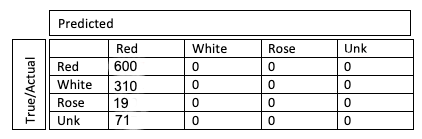


   
In this figure the columns represent the predictions coming from our model and the rows represent the actual values of the labels.
As an example, our model predicted all labels as "Red". This can be seen in the first column.
However, not all the predictions were correct! 310 of the "Red" predictions were made for the actual labels of "White". Similarly, 19 predictions were not correct (as they should have been "Rose") and similarly the remainig 71 predictions (as they should have been "unk").

To evaluate our models better, for each class (label), we will define a __Precision__ and __Recall__ score by looking at this confusion matrix.


### Precision ### 
For label X, precision is the number of correctly predicted labels __out of all predicted labels__ (for the actual label X) (What percent of the predicted labels are correct? The focus is on predictions.).<br>

\begin{align}
Precision(p) = \frac{correctly\ predicted\ as\ label\ A}{all\ predictions\ made\ as\ label\ A} = \frac{true\ positives}{true\ positives\ +\ false\ positives} \\
\end{align}

true positive = correctly predicted as label A<br>
false positive = incorrectly predicted as label A<br>



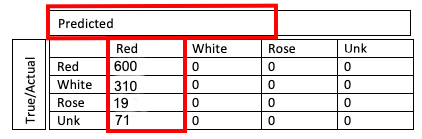


precision for the "Red" label is 600 / (600 + 310 + 19 + 71) = 600 / 1000 = 60% (so 60% of "Red" predictions are in fact "Red")<br>
precision for the "White" label is 0 / 0 = N/A (zero division)


### Recall ### 
For label X, recall is the number of correctly predicted labels (same as above) __out of the number of actual labels A__ (Out of all actual label A's, what percent of them did the model predict correctly? The focus is on actual labels.).<br>
In other words: r = true positives / (true positives + false negatives)

\begin{align}
Recall(r) = \frac{correctly\ predicted\ as\ label\ A}{all\ actual\ items\ with\ label\ A} = \frac{true\ positives}{true\ positives\ +\ false\ negatives} \\
\end{align}

true positive = correctly predicted as label A<br>
false negative = predicted as another label, whereas it is actually label A



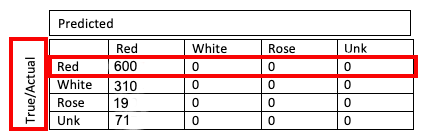


recall for the "Red" label is 600 / (600 + 0 + 0 + 0) = 1 (from all the wine with color "Red", we predicted all of these labels correctly)<br>
recall for the "White" label is 0 / (0 + 310 + 0 + 0) = 0 (from all the wine with color "White", we predicted none of these labels correctly)

### F1 Score ###
Ok so precision and recall measures the performance of a model from two different perspectives.
We can combine the two measures to get a single, balanced score, which is also called __F1 score__.
Obtaining a single score is often easier to compare different models.

\begin{align}
F1 = 2 * \frac{Precision * Recall}{Precision + Recall} \\
\end{align}

F1 score for the "Red" label is 2 \* (0.6 \* 1) / (0.6 + 1) = 1.2 / 1.6 = 0.75<br>
F1 score for the "White" labels is N/A as Precision is N/A.



###Classification report
We can get the summary of all these measures, per label, as follows:

In [20]:
from sklearn.metrics import classification_report
print(classification_report(test_colors, dummy_predictions))


              precision    recall  f1-score   support

         Red       0.60      1.00      0.75       600
        Rose       0.00      0.00      0.00        19
       White       0.00      0.00      0.00       310
         unk       0.00      0.00      0.00        71

    accuracy                           0.60      1000
   macro avg       0.15      0.25      0.19      1000
weighted avg       0.36      0.60      0.45      1000



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(test_colors, test_predictions_10))

              precision    recall  f1-score   support

         Red       0.91      0.73      0.81      9277
        Rose       0.00      0.00      0.00       340
       White       0.53      0.92      0.68      4592
         unk       0.00      0.00      0.00      1073

    accuracy                           0.72     15282
   macro avg       0.36      0.41      0.37     15282
weighted avg       0.71      0.72      0.69     15282



### Support material from Youtube

Here I will list a couple of videos you can check on youtube to digest these definitions. It is important that you familiarize yourself with accuracy, precision, recall, f1-score and the confusion matrix!

1. Accuracy, Precision, Recall and F1-score:
https://www.youtube.com/watch?v=j-EB6RqqjGI

2. The second video explains clearly what a confusion matrix is in classification tasks. Watch out though that the predicted and actual values are displayed differently (columns vs. rows).
https://www.youtube.com/watch?v=Kdsp6soqA7o

In the previous results, we are especially interested in the precision, recall and f1-score for each label.
"Support" is the frequency of each (correct) label.

While the label-specific scores are good to measure the performance of the model for a specific label (the first four rows in the figure above), with these scores it is difficult to measure the overall performance of the given model.

Therefore, we also see three additional rows, which measure the overall performance of the model (and not for a specific label). These measures are:
- __accuracy__: correctly predicted labels divided by all labels (we discussed why this measure is perhaps not a good one in the previous cells)
- __macro avg__: Calculate precision, recall and f1 metrics for each label, and find their average. This does not take label imbalance into account: f1 scores are averaged (with equal weights)
- __weighted avg__: Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). This alters "macro" to account for label imbalance (it can result in an F-score that is not between precision and recall).

From this point on, we will measure the overall performance of a model with weighted avg of f1-score.
For this dummy system, the f1 score (weighted avg) is 0.45.

So what about other models that we have built so far. How do they perform with respect to the f1-score?
Let's first evaluate the model that used 10 terms as features:

### DIY

Print:
- the confusion matrix for the predictions obtained from our logisticRegression model (test_predictions_10)
- the classification report for these predictions

In [18]:
# The order of the labels is not important, but it is important to provide all the labels.
cm2 = confusion_matrix(test_colors, test_predictions_10, labels=labels)
pd.DataFrame(cm2, index=labels, columns = labels)

,Red,White,Rose,unk
Red,429,171,0,0
White,17,293,0,0
Rose,3,16,0,0
unk,11,60,0,0


In [ ]:
# Get classification report for test_predictions_10
print(classification_report(test_colors, test_predictions_10))

              precision    recall  f1-score   support

         Red       0.91      0.73      0.81      9277
        Rose       0.00      0.00      0.00       340
       White       0.53      0.92      0.68      4592
         unk       0.00      0.00      0.00      1073

    accuracy                           0.72     15282
   macro avg       0.36      0.41      0.37     15282
weighted avg       0.71      0.72      0.69     15282



We are especially interested in the f1-score (weighted avg) in the above figure.
As we can see, this model does much better than the dummy system, with an f1-score of 0.69 (Dummy score had an f1-score of 0.45).
What this means is that, our features are indeed useful and we can come up with predictions that are much better than a dummy baseline system.

Let's now evaluate the model, which used all nouns as features.
First, we load this model:

In [22]:
import pickle

# Load the model with all nouns used as features 
with open('logreg_nouns.pkl', 'rb') as file:
    lr_nouns = pickle.load(file)
    
# Let's see what are the possible labels to predict (and in which order they are stored)
print(lr_nouns.classes_)



['Red' 'Rose' 'White' 'unk']


To be able to evaluate this model, we need the predictions. 
To get the predictions on the test set, we need the features. Here I will load the features for the test set from a file, which were generated in the previous week: 
(alternatively, we could have also saved the predictions. Please try this yourself.)

In [23]:
# Let's load our test features we generated with all nouns as we don't want to generate them once more (which takes time)
# numpy arrays (which we use to store the features) can be saved as follows before being loaded:
# numpy.save("test_features_nouns.npy", test_features_nouns)

test_features_nouns = numpy.load("test_features_nouns.npy")
print(test_features_nouns.shape)

(1000, 4098)


(25)
Having the model loaded and the features for the test set, we can now get predictions and the prediction results.

In [24]:
from sklearn.metrics import classification_report
# we provide all the features as inoput to our model to obtain predictions
test_predictions_nouns = lr_nouns.predict(test_features_nouns)

# Print the classification report
print(classification_report(test_colors, test_predictions_nouns))

              precision    recall  f1-score   support

         Red       0.60      0.60      0.60       600
        Rose       0.00      0.00      0.00        19
       White       0.33      0.40      0.36       310
         unk       0.11      0.04      0.06        71

    accuracy                           0.48      1000
   macro avg       0.26      0.26      0.25      1000
weighted avg       0.47      0.48      0.47      1000



These results are interesting and perhaps a bit unexpected at first sight.<br>
We see that the f1-score (weighted avg) of the model (0.47) that used all nouns as features is higher than the dummy baseline (0.45) but much lower than the model that used only 10 terms as features (0.69).<br>

One possible explanation for this observation is that nouns are not good predictors of the wine color!<br>
These results also show the importance of evaluation as more features does not necessarily mean better performance.<br>

We need "good" features to train "good" predictive models!



## Supervised machine learning: Regression

As you remember, we talked about two types of supervised machine learning approaches:<br>
__Classification__: Predicting a class. For instance, to determine if a patient is sick, if an email is spam or predicting the color of a wine based on its reviews.<br>
__Regression__: Predicting a numerical value. It would be the case of the prices of a house when choosing different options or the demand of occupation of a hotel.<br>

We will work on the same data set further to build a regression model, in order to predict the score of a wine based on its reviews. In this regression task, the predictions we make will be numerical values between 80 and 100 (higher means a better wine!). While in classification, the classes do not have any relations to each other, in regression the numbers we predict are ordered! In other words, the different values we can predict have an ordinality relationship. 

Ordinality: A number indicating the position of something in a series or order.

We will use the same feature extraction techniques to build a regression model:
1. Extract features from raw data
2. Train a model using the features and the correct values (wine score) in the training set
3. Use the trained model to predict the actual values in the test set 


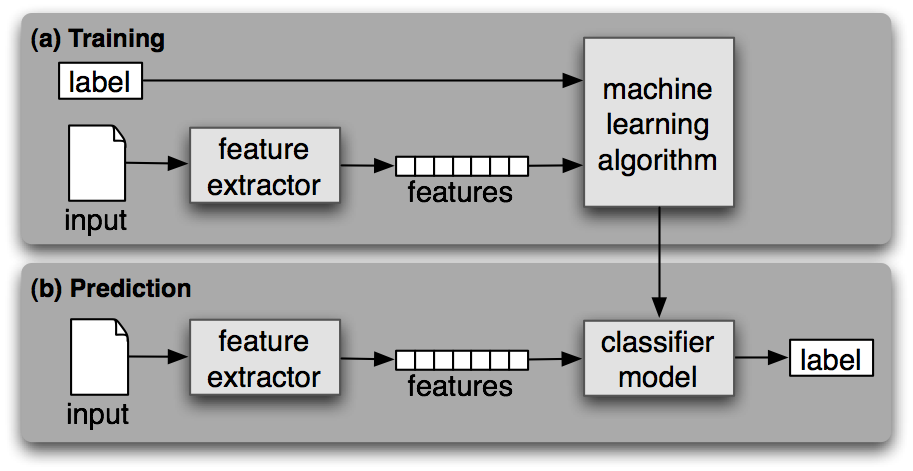

(29)
### Linear Regression

If you remember, we used the following equation for logistic regression:


\begin{align}
z = c_0+c_1*𝑥_1+c_2*𝑥_2+...+c_𝑛*𝑥_𝑛
\end{align}


In this equation we have n features (represented by x) and n coefficients (weights) per feature (represented by c). Finally, we have c0, which represents the intercept (or bias), which models the predicted value in the absence of any of the features (when the coefficients of each feature is 0, the only remaining value in this equation will be c0).

We also discussed that the value of z lies between -∞ and +∞. 
In logistic regression, we apply the sigmoid (or logistic function) to this value to obtain prob. values between 0 and 1 and he final probability scores let the model predict the label. 

In linear regression, as the values we predict are continuous, we don't need any modifications. We will let the model predict simply a value between  -∞ and +∞.

